<a href="https://colab.research.google.com/github/renanwta/Studies/blob/main/Machine_Learning_Linear_Regression_Red_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Portifólio collab/Datasets/wine+quality/winequality-red.csv', sep = ';')

# Conhecendo os dados

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):

   1 - fixed acidity

   2 - volatile acidity

   3 - citric acid

   4 - residual sugar

   5 - chlorides

   6 - free sulfur dioxide

   7 - total sulfur dioxide

   8 - density

   9 - pH

   10 - sulphates

   11 - alcohol

Output variable (based on sensory data):

   12 - quality (score between 0 and 10)

In [ ]:
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
for col in dados.columns:
  print(col)
  print(dados[col].unique())
  print(30*'--')

fixed acidity
[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
------------------------------------------------------------
volatile acidity
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37

# Análises das variáveis dependente e variáveis explicativas

Text(0.5, 1.1, 'Dispersão das variáveis explicativas com a dependente')

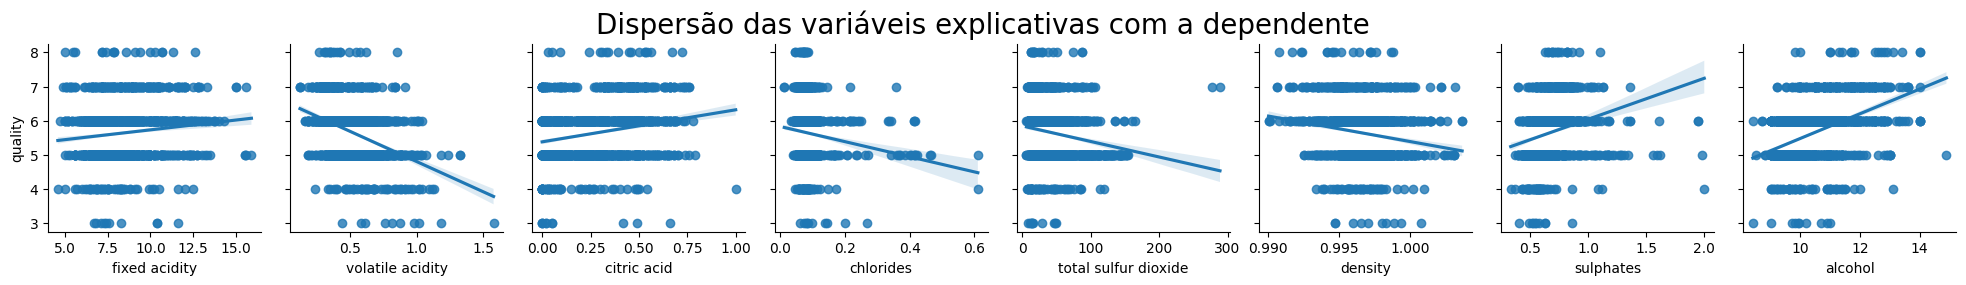

In [ ]:
ax = sns.pairplot(dados, y_vars = 'quality', x_vars = ['fixed acidity', 'volatile acidity', 'citric acid' ,'chlorides'  ,	'total sulfur dioxide' 	,'density'  , 'sulphates', 'alcohol'], kind = 'reg')

ax.fig.suptitle('Dispersão das variáveis explicativas com a dependente',fontsize = 20, y = 1.1)

In [ ]:
dados_rl = dados[['fixed acidity', 'volatile acidity', 'citric acid' ,'chlorides'  ,	'total sulfur dioxide' 	,'density'  , 'sulphates', 'alcohol','quality']]

In [ ]:
dados_rl.head(1)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.7,0.0,0.076,34.0,0.9978,0.56,9.4,5


In [ ]:
dados_rl.corr()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.093705,-0.113181,0.668047,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.061298,0.076470,0.022026,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.203823,0.035533,0.364947,0.312770,0.109903,0.226373
chlorides,0.093705,0.061298,0.203823,1.000000,0.047400,0.200632,0.371260,-0.221141,-0.128907
total sulfur dioxide,-0.113181,0.076470,0.035533,0.047400,1.000000,0.071269,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.200632,0.071269,1.000000,0.148506,-0.496180,-0.174919
sulphates,0.183006,-0.260987,0.312770,0.371260,0.042947,0.148506,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,-0.221141,-0.205654,-0.496180,0.093595,1.000000,0.476166
quality,0.124052,-0.390558,0.226373,-0.128907,-0.185100,-0.174919,0.251397,0.476166,1.000000


# Criando o Modelo de regressão

## Criando as variáveis dependente e independente

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = dados_rl['quality']

In [ ]:
X = dados_rl[['alcohol','volatile acidity']]

## Criando o dataset de Treino e Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

## Verificando os tamanhos

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 2)
(480, 2)
(1119,)
(480,)


## Criando os Modelos

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
modelo = LinearRegression()

## Treinando o Modelo com base no nosso X e Y train

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

### Verificando R²

In [ ]:
print('R² {}'.format(modelo.score(X_train,y_train).round(2)))

R² 0.33


Ou seja, ele ajusta bem baixo

## Gerando previsões para os dados de Teste com o modelo de treino

In [ ]:
y_previsto = modelo.predict(X_test)

In [ ]:
print('R² {}'.format(metrics.r2_score(y_test,y_previsto).round(2)))

R² 0.28


# Criando uma função preditiva

In [ ]:
dados_rl[['alcohol','volatile acidity','quality']][0:1]

,alcohol,volatile acidity,quality
0,9.4,0.7,5


In [ ]:
alcohol = 9.4
volatile_acidity = 0.7

entrada = [[alcohol, volatile_acidity]]

y = modelo.predict(entrada)
print('A provável nota será de: {}'.format(y[0].round(2)))

A provável nota será de: 5.09


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Criando o Modelo 2 de regressão

A ideia é melhorar o valor de R2

Neste caso vamos usar todas as variáveis que estão relacionado com a nota

In [ ]:
# selecionando a variavel independente e as variaveis explicativas
y2 = dados_rl['quality']
X2 = dados_rl[['fixed acidity', 'volatile acidity', 'citric acid' ,'chlorides'  ,	'total sulfur dioxide' 	,'density'  , 'sulphates', 'alcohol']]

# criar o modelo de regressão
from sklearn.linear_model import LinearRegression
from sklearn import metrics # para checar o R2

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.3, random_state = 101)

modelo2 = LinearRegression()
modelo2.fit(X2_train,y2_train)



LinearRegression()

In [ ]:
# observando o R2 entre o teste e o treino
y2_previsto = modelo2.predict(X2_test)

print('R² {}'.format(modelo2.score(X2_train,y2_train).round(2)))

print('R² {}'.format(metrics.r2_score(y2_test,y2_previsto).round(2)))

R² 0.38
R² 0.3


In [ ]:
dados_rl[0:1]

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.7,0.0,0.076,34.0,0.9978,0.56,9.4,5


In [ ]:
#criando_uma_nova_função
fixed_acidity = 7.4
volatile_acidity = 0.7
citric_acid = 0.0
chlorides = 0.076
total_sulfur_dioxide = 34
density = 0.9978
sulphates = 0.56
alcohol = 9.4

entrada = [[fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,sulphates,alcohol]]

print(modelo2.predict(entrada)[0].round(2))


5.11


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Análisando os R² dos Modelos

In [ ]:
print('R² modelo 1 = {}'.format(metrics.r2_score(y_test,y_previsto).round(2)))
print('R² modelo 2 = {}'.format(metrics.r2_score(y2_test,y2_previsto).round(2)))

R² modelo 1 = 0.28
R² modelo 2 = 0.3


Observando o R² do modelo 1 e modelo 2 temos que o R² do primeiro modelo valo 0.28, enquanto ao R² do segundo modelo é 0.3, assim dizemos que ambos o segundo moledo é mais eficiente


## Análisando pelas métricas de regressão

In [ ]:
# Modelo 1
EQM = metrics.mean_squared_error(y_test,y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test,y_previsto)).round(2)
R2 = metrics.r2_score(y_test,y_previsto).round(2)


pd.DataFrame([EQM,REQM,R2],['EQM','REQM','R²'],columns = ['Métricas'])

,Métricas
EQM,0.50
REQM,0.71
R²,0.28


In [ ]:
# Modelo 2
EQM_2 = metrics.mean_squared_error(y2_test,y2_previsto).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test,y2_previsto)).round(2)
R2_2 = metrics.r2_score(y2_test,y2_previsto).round(2)


pd.DataFrame([EQM_2,REQM_2,R2_2],['EQM','REQM','R²'],columns = ['Métricas'])

,Métricas
EQM,0.49
REQM,0.70
R²,0.30


Observando o R² do modelo 1 e modelo 2 temos que o R² do primeiro modelo valo 0.28, enquanto ao R² do segundo modelo é 0.3, assim dizemos que ambos o segundo moledo é mais eficiente


# Estudo dos resíduos

## Calculando a previsão dos dados de treino

In [ ]:
y2_previsao_train = modelo2.predict(X2_train)

In [ ]:
residuo = y2_train - y2_previsao_train

## Análise gráfica dos resíduos

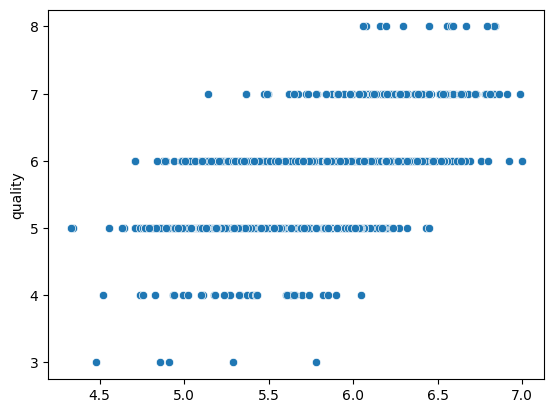

In [ ]:
ax = sns.scatterplot(x = y2_previsao_train, y = y2_train)

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

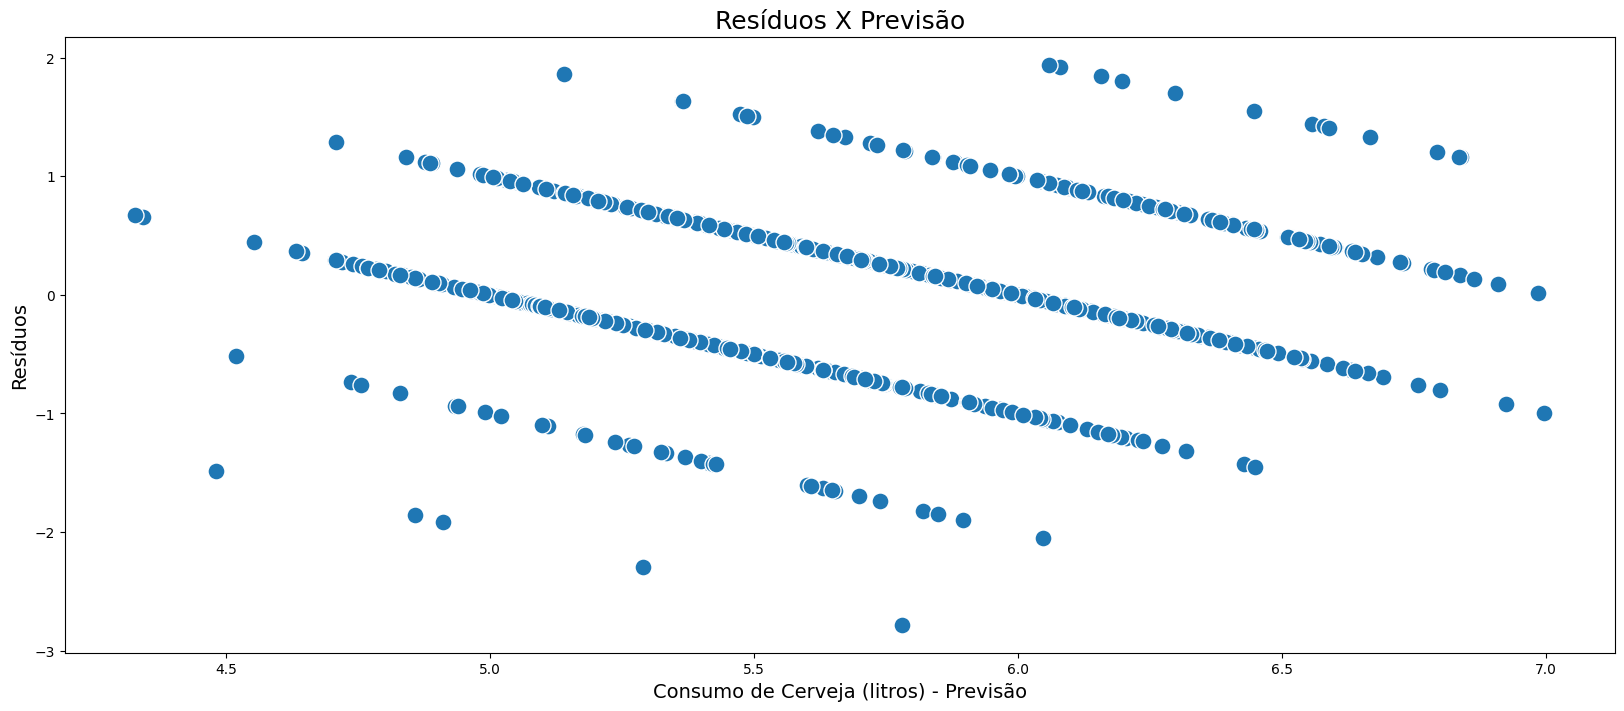

In [ ]:
ax = sns.scatterplot(x=y2_previsao_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax